   Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26         52        38     Sandy      Maize        37          0   
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7          9   
3           32         62        34       Red    Tobacco        22          0   
4           28         54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  
Mean Squared Error: 0.55
R-squared: 0.8449612403100775
Fertilizer recommendation: ['28-28']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


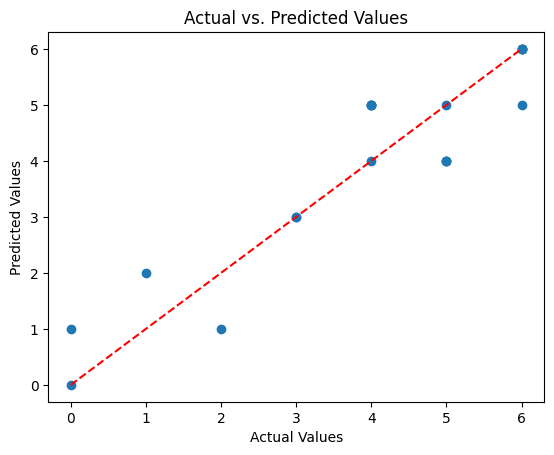

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/NafeesSadat/Fertilizer-Recommendation-Dataset/696eeb6073e664eb5b3344f89c1a2e4655fe8da0/Fertilizer%20Prediction.csv')

# Print the first few rows of the dataset
print(data.head())

# Split the dataset into input features and target variable
X = data[['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']]
y = data['Fertilizer Name']

# Perform label encoding on the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Perform one-hot encoding on categorical features
ct = ColumnTransformer([('encoder', OneHotEncoder(), [3, 4])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)


# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predicted values back to original labels
y_pred_rounded = np.round(y_pred).astype(int)
unique_labels_train = np.unique(y_train)
most_frequent_label = np.argmax(np.bincount(y_train))
y_pred_mapped = np.where(np.isin(y_pred_rounded, unique_labels_train), y_pred_rounded, most_frequent_label)
y_pred_inverse = le.inverse_transform(y_pred_mapped)

# Convert the test set labels back to original labels
y_test_inverse = le.inverse_transform(y_test)

# Convert the predicted values back to numeric labels
y_pred_numeric = le.transform(y_pred_inverse)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_numeric)
r2 = r2_score(y_test, y_pred_numeric)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Example usage: Predict fertilizer recommendation for a new sample
new_sample = [[32, 56, 50, 'Sandy', 'Oil seeds', 15, 4, 36]]
new_sample_encoded = ct.transform(new_sample)
recommendation = model.predict(new_sample_encoded)
recommendation_rounded = np.round(recommendation).astype(int)
recommendation_mapped = np.where(np.isin(recommendation_rounded, unique_labels_train), recommendation_rounded, most_frequent_label)
recommendation_inverse = le.inverse_transform(recommendation_mapped)
print('Fertilizer recommendation:', recommendation_inverse)

# Plot the actual and predicted values with a linear regression line
plt.scatter(y_test, y_pred_numeric)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()